In [1]:
from HMM import unsupervised_HMM, supervised_HMM
import matplotlib as plt
import numpy as np
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## 3 - Pre-processing

In [2]:
from Utility import get_poem_sequence

obs, obs_Y, obs_map = get_poem_sequence('data/shakespeare3.txt', 'line')

print(obs[:10])
print(obs_Y[:10])
print(obs_map['rest_1'])
#print(obs_map)


1
[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13, 6], [14, 15, 16, 17, 18, 19, 20, 21, 6], [22, 23, 24, 11, 25, 22, 26, 27], [14, 28, 29, 30, 31, 32, 33, 34, 6], [35, 36, 37, 38, 39, 40, 41, 6], [42, 43, 44, 45, 46, 47, 6], [36, 48, 36, 49, 6, 30, 36, 50, 48, 51, 52, 27], [28, 7, 53, 54, 16, 55, 56, 57, 6], [58, 59, 60, 30, 16, 61, 62, 6]]
[[1, 3, 3, 1, 5, 2, 11], [1, 10, 10, 1, 1, 3, 1, 11], [1, 1, 0, 10, 1, 1, 1, 2, 11], [1, 3, 1, 1, 1, 1, 6, 11], [1, 1, 6, 1, 1, 1, 1, 1, 11], [10, 1, 1, 1, 1, 10, 3, 11], [3, 1, 3, 1, 5, 1, 11], [1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 3, 11], [1, 1, 1, 1, 0, 1, 1, 6, 11], [0, 3, 3, 1, 0, 3, 1, 11]]
974


In [4]:
count_Y = np.zeros(12)
for iobs in obs_Y:
    for iiobs in iobs:
        count_Y[iiobs] += 1
print(count_Y)

[9.1500e+02 1.2825e+04 7.0600e+02 1.8590e+03 6.0000e+00 2.0100e+02
 2.4000e+02 1.3000e+01 4.7000e+01 6.0000e+00 5.4300e+02 2.5440e+03]


## 5 - Poetry generation, part I - HMM (from HW6)

In [28]:
hmm_supervise = supervised_HMM(obs[:1000], obs_Y[:1000])

In [29]:
hmm5 = unsupervised_HMM(obs[:10], 5, 100, 2019)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


In [30]:
hmm6 = unsupervised_HMM(obs[:10], 6, 100, 2019)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


In [33]:
from HMM_helper import obs_map_reverser

def sample_sentence_multipleModel(hmm_list, obs_map, n_syllable = 10):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    # emission, states = hmm.generate_emission(n_syllable)
    
    #sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize()
#print(sample_sentence_multipleModel(hmm5, obs_map, n_syllable=10))

In [36]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm_supervise, obs_map, n_syllable=10))

Sample Sentence:
Undivided_4 i_1 again_2 thy_1 love_1 nor_1 comfort_2 faith_1 no_1 cannot_2


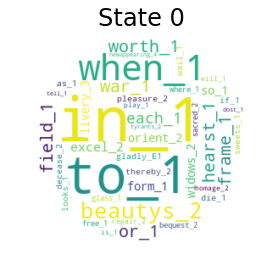

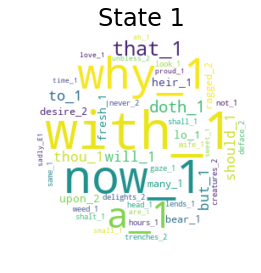

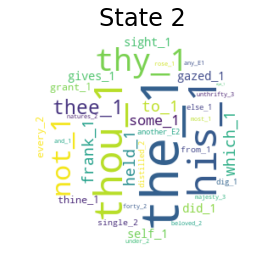

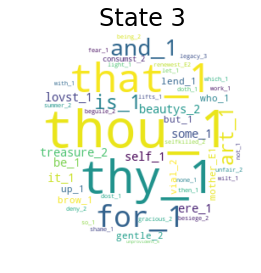

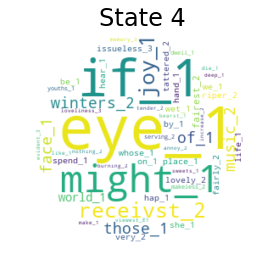

In [8]:
wordclouds = states_to_wordclouds(hmm5, obs_map)

## 6 - Poetry generation, part II - RNN